In [1]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.ion()

In [3]:
train = pd.read_csv('./data/train.csv')

In [4]:
train.shape

(1205, 12)

In [5]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [6]:
test = pd.read_csv('./data/test.csv')

In [7]:
test.shape

(50, 10)

In [8]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [9]:
train = train[train['석식계'] != 0]

## 파생변수 생성

In [10]:
train['식사가능인원'] = train['본사정원수'] - (train['본사휴가자수'] + train['본사출장자수'] + train['현본사소속재택근무자수'])

## 스케일링

### min-max sacaler

In [11]:
scale_col = ['본사정원수', '식사가능인원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계', '석식계']

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train[scale_col])

MinMaxScaler()

In [15]:
scaler.data_max_

array([3305., 2921., 1224.,  378., 1044.,  533., 1459.,  905.])

In [16]:
scaler.data_min_

array([2601., 1372.,   23.,   41.,    0.,    0.,  296.,  104.])

In [17]:
mm_ = pd.DataFrame(scaler.transform(train[scale_col]), columns=[col_name + '_mm' for col_name in scale_col])

In [18]:
mm_.shape

(1162, 8)

In [19]:
mm_.head()

,본사정원수_mm,식사가능인원_mm,본사휴가자수_mm,본사출장자수_mm,본사시간외근무명령서승인건수_mm,현본사소속재택근무자수_mm,중식계_mm,석식계_mm
0,0.0,0.664300,0.022481,0.323442,0.227969,0.0,0.638865,0.283396
1,0.0,0.649451,0.022481,0.391691,0.305556,0.0,0.490972,0.569288
2,0.0,0.641059,0.027477,0.412463,0.106322,0.0,0.619948,0.585518
3,0.0,0.584248,0.067444,0.531157,0.340038,0.0,0.586414,0.525593
4,0.0,0.497095,0.212323,0.415430,0.032567,0.0,0.540843,0.282147


### log1p

In [20]:
import numpy as np

In [21]:
l1p = np.log1p(train[scale_col])

In [22]:
l1p.columns = [col_name + '_l1p' for col_name in scale_col]

In [23]:
l1p.shape

(1162, 8)

In [24]:
l1p.head()

,본사정원수_l1p,식사가능인원_l1p,본사휴가자수_l1p,본사출장자수_l1p,본사시간외근무명령서승인건수_l1p,현본사소속재택근무자수_l1p,중식계_l1p,석식계_l1p
0,7.864036,7.784057,3.931826,5.017280,5.476464,0.0,6.946976,5.805135
1,7.864036,7.774436,3.931826,5.159055,5.768321,0.0,6.766192,6.329721
2,7.864036,7.768956,4.043051,5.198497,4.718499,0.0,6.925595,6.352629
3,7.864036,7.731053,4.653960,5.398163,5.874931,0.0,6.886532,6.265301
4,7.864036,7.669962,5.631212,5.204007,3.555348,0.0,6.830874,5.802118


### 상관계수

In [25]:
df = train.copy()

In [26]:
df[mm_.columns] = mm_

In [27]:
df.shape

(1162, 21)

In [28]:
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식계,식사가능인원,본사정원수_mm,식사가능인원_mm,본사휴가자수_mm,본사출장자수_mm,본사시간외근무명령서승인건수_mm,현본사소속재택근무자수_mm,중식계_mm,석식계_mm
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,331.0,2401.0,0.0,0.664300,0.022481,0.323442,0.227969,0.0,0.638865,0.283396
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,560.0,2378.0,0.0,0.649451,0.022481,0.391691,0.305556,0.0,0.490972,0.569288
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,573.0,2365.0,0.0,0.641059,0.027477,0.412463,0.106322,0.0,0.619948,0.585518
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,525.0,2277.0,0.0,0.584248,0.067444,0.531157,0.340038,0.0,0.586414,0.525593
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,330.0,2142.0,0.0,0.497095,0.212323,0.415430,0.032567,0.0,0.540843,0.282147


In [29]:
df[l1p.columns] = l1p

In [30]:
df.shape

(1162, 29)

In [31]:
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식계_mm,석식계_mm,본사정원수_l1p,식사가능인원_l1p,본사휴가자수_l1p,본사출장자수_l1p,본사시간외근무명령서승인건수_l1p,현본사소속재택근무자수_l1p,중식계_l1p,석식계_l1p
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0.638865,0.283396,7.864036,7.784057,3.931826,5.017280,5.476464,0.0,6.946976,5.805135
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,0.490972,0.569288,7.864036,7.774436,3.931826,5.159055,5.768321,0.0,6.766192,6.329721
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,0.619948,0.585518,7.864036,7.768956,4.043051,5.198497,4.718499,0.0,6.925595,6.352629
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,0.586414,0.525593,7.864036,7.731053,4.653960,5.398163,5.874931,0.0,6.886532,6.265301
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,0.540843,0.282147,7.864036,7.669962,5.631212,5.204007,3.555348,0.0,6.830874,5.802118


In [32]:
df.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,본사정원수_mm,식사가능인원_mm,...,중식계_mm,석식계_mm,본사정원수_l1p,식사가능인원_l1p,본사휴가자수_l1p,본사출장자수_l1p,본사시간외근무명령서승인건수_l1p,현본사소속재택근무자수_l1p,중식계_l1p,석식계_l1p
본사정원수,1.000000,0.244688,-0.060481,0.148946,0.458206,-0.115295,-0.243487,0.497147,0.751824,0.368836,...,-0.089646,-0.239345,0.999564,0.465356,0.330844,-0.068335,-0.045437,0.514000,-0.127444,-0.258226
본사휴가자수,0.244688,1.000000,-0.264451,-0.247164,0.063344,-0.388931,-0.444938,-0.556329,0.135320,0.028726,...,-0.019912,-0.057641,0.241874,-0.600007,0.906600,-0.293170,-0.132446,0.100215,-0.443318,-0.502619
본사출장자수,-0.060481,-0.264451,1.000000,-0.308851,-0.352766,-0.524489,-0.203356,0.132690,0.018926,0.065384,...,-0.081535,-0.035091,-0.061692,0.152398,-0.173457,0.971032,-0.197899,-0.286865,-0.490804,-0.121162
본사시간외근무명령서승인건수,0.148946,-0.247164,-0.308851,1.000000,0.148343,0.548540,0.579223,0.330230,0.137791,0.043171,...,0.017204,-0.035652,0.151277,0.326344,-0.238227,-0.264594,0.841940,0.143457,0.538657,0.535887
현본사소속재택근무자수,0.458206,0.063344,-0.352766,0.148343,1.000000,0.072115,-0.125735,-0.149331,0.400806,-0.007805,...,-0.068183,-0.242919,0.463231,-0.142830,0.126633,-0.362169,-0.012882,0.922360,0.069780,-0.139189
중식계,-0.115295,-0.388931,-0.524489,0.548540,0.072115,1.000000,0.644331,0.291129,-0.143157,-0.036140,...,0.107166,0.091741,-0.115594,0.301966,-0.380176,-0.444054,0.374873,0.009442,0.985603,0.604236
석식계,-0.243487,-0.444938,-0.203356,0.579223,-0.125735,0.644331,1.000000,0.257651,-0.245496,-0.088442,...,-0.001239,0.158217,-0.244958,0.272848,-0.424126,-0.166872,0.503711,-0.206264,0.646389,0.972145
식사가능인원,0.497147,-0.556329,0.132690,0.330230,-0.149331,0.291129,0.257651,1.000000,0.394116,0.321634,...,-0.013632,-0.043876,0.496165,0.995947,-0.458477,0.161687,0.121494,-0.092770,0.317036,0.278743
본사정원수_mm,0.751824,0.135320,0.018926,0.137791,0.400806,-0.143157,-0.245496,0.394116,1.000000,0.492803,...,-0.106032,-0.245166,0.757741,0.374313,0.228411,0.004642,-0.048479,0.483918,-0.150149,-0.246787
식사가능인원_mm,0.368836,0.028726,0.065384,0.043171,-0.007805,-0.036140,-0.088442,0.321634,0.492803,1.000000,...,0.299206,0.256612,0.368526,0.309034,0.063714,0.056923,-0.039439,-0.043150,-0.036543,-0.090411


In [33]:
df.corr()[scale_col + list(mm_.columns) + list(l1p.columns)]

,본사정원수,식사가능인원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,본사정원수_mm,식사가능인원_mm,...,중식계_mm,석식계_mm,본사정원수_l1p,식사가능인원_l1p,본사휴가자수_l1p,본사출장자수_l1p,본사시간외근무명령서승인건수_l1p,현본사소속재택근무자수_l1p,중식계_l1p,석식계_l1p
본사정원수,1.000000,0.497147,0.244688,-0.060481,0.148946,0.458206,-0.115295,-0.243487,0.751824,0.368836,...,-0.089646,-0.239345,0.999564,0.465356,0.330844,-0.068335,-0.045437,0.514000,-0.127444,-0.258226
본사휴가자수,0.244688,-0.556329,1.000000,-0.264451,-0.247164,0.063344,-0.388931,-0.444938,0.135320,0.028726,...,-0.019912,-0.057641,0.241874,-0.600007,0.906600,-0.293170,-0.132446,0.100215,-0.443318,-0.502619
본사출장자수,-0.060481,0.132690,-0.264451,1.000000,-0.308851,-0.352766,-0.524489,-0.203356,0.018926,0.065384,...,-0.081535,-0.035091,-0.061692,0.152398,-0.173457,0.971032,-0.197899,-0.286865,-0.490804,-0.121162
본사시간외근무명령서승인건수,0.148946,0.330230,-0.247164,-0.308851,1.000000,0.148343,0.548540,0.579223,0.137791,0.043171,...,0.017204,-0.035652,0.151277,0.326344,-0.238227,-0.264594,0.841940,0.143457,0.538657,0.535887
현본사소속재택근무자수,0.458206,-0.149331,0.063344,-0.352766,0.148343,1.000000,0.072115,-0.125735,0.400806,-0.007805,...,-0.068183,-0.242919,0.463231,-0.142830,0.126633,-0.362169,-0.012882,0.922360,0.069780,-0.139189
중식계,-0.115295,0.291129,-0.388931,-0.524489,0.548540,0.072115,1.000000,0.644331,-0.143157,-0.036140,...,0.107166,0.091741,-0.115594,0.301966,-0.380176,-0.444054,0.374873,0.009442,0.985603,0.604236
석식계,-0.243487,0.257651,-0.444938,-0.203356,0.579223,-0.125735,0.644331,1.000000,-0.245496,-0.088442,...,-0.001239,0.158217,-0.244958,0.272848,-0.424126,-0.166872,0.503711,-0.206264,0.646389,0.972145
식사가능인원,0.497147,1.000000,-0.556329,0.132690,0.330230,-0.149331,0.291129,0.257651,0.394116,0.321634,...,-0.013632,-0.043876,0.496165,0.995947,-0.458477,0.161687,0.121494,-0.092770,0.317036,0.278743
본사정원수_mm,0.751824,0.394116,0.135320,0.018926,0.137791,0.400806,-0.143157,-0.245496,1.000000,0.492803,...,-0.106032,-0.245166,0.757741,0.374313,0.228411,0.004642,-0.048479,0.483918,-0.150149,-0.246787
식사가능인원_mm,0.368836,0.321634,0.028726,0.065384,0.043171,-0.007805,-0.036140,-0.088442,0.492803,1.000000,...,0.299206,0.256612,0.368526,0.309034,0.063714,0.056923,-0.039439,-0.043150,-0.036543,-0.090411


In [34]:
df.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,본사정원수_mm,식사가능인원_mm,...,중식계_mm,석식계_mm,본사정원수_l1p,식사가능인원_l1p,본사휴가자수_l1p,본사출장자수_l1p,본사시간외근무명령서승인건수_l1p,현본사소속재택근무자수_l1p,중식계_l1p,석식계_l1p
본사정원수,1.000000,0.244688,-0.060481,0.148946,0.458206,-0.115295,-0.243487,0.497147,0.751824,0.368836,...,-0.089646,-0.239345,0.999564,0.465356,0.330844,-0.068335,-0.045437,0.514000,-0.127444,-0.258226
본사휴가자수,0.244688,1.000000,-0.264451,-0.247164,0.063344,-0.388931,-0.444938,-0.556329,0.135320,0.028726,...,-0.019912,-0.057641,0.241874,-0.600007,0.906600,-0.293170,-0.132446,0.100215,-0.443318,-0.502619
본사출장자수,-0.060481,-0.264451,1.000000,-0.308851,-0.352766,-0.524489,-0.203356,0.132690,0.018926,0.065384,...,-0.081535,-0.035091,-0.061692,0.152398,-0.173457,0.971032,-0.197899,-0.286865,-0.490804,-0.121162
본사시간외근무명령서승인건수,0.148946,-0.247164,-0.308851,1.000000,0.148343,0.548540,0.579223,0.330230,0.137791,0.043171,...,0.017204,-0.035652,0.151277,0.326344,-0.238227,-0.264594,0.841940,0.143457,0.538657,0.535887
현본사소속재택근무자수,0.458206,0.063344,-0.352766,0.148343,1.000000,0.072115,-0.125735,-0.149331,0.400806,-0.007805,...,-0.068183,-0.242919,0.463231,-0.142830,0.126633,-0.362169,-0.012882,0.922360,0.069780,-0.139189
중식계,-0.115295,-0.388931,-0.524489,0.548540,0.072115,1.000000,0.644331,0.291129,-0.143157,-0.036140,...,0.107166,0.091741,-0.115594,0.301966,-0.380176,-0.444054,0.374873,0.009442,0.985603,0.604236
석식계,-0.243487,-0.444938,-0.203356,0.579223,-0.125735,0.644331,1.000000,0.257651,-0.245496,-0.088442,...,-0.001239,0.158217,-0.244958,0.272848,-0.424126,-0.166872,0.503711,-0.206264,0.646389,0.972145
식사가능인원,0.497147,-0.556329,0.132690,0.330230,-0.149331,0.291129,0.257651,1.000000,0.394116,0.321634,...,-0.013632,-0.043876,0.496165,0.995947,-0.458477,0.161687,0.121494,-0.092770,0.317036,0.278743
본사정원수_mm,0.751824,0.135320,0.018926,0.137791,0.400806,-0.143157,-0.245496,0.394116,1.000000,0.492803,...,-0.106032,-0.245166,0.757741,0.374313,0.228411,0.004642,-0.048479,0.483918,-0.150149,-0.246787
식사가능인원_mm,0.368836,0.028726,0.065384,0.043171,-0.007805,-0.036140,-0.088442,0.321634,0.492803,1.000000,...,0.299206,0.256612,0.368526,0.309034,0.063714,0.056923,-0.039439,-0.043150,-0.036543,-0.090411


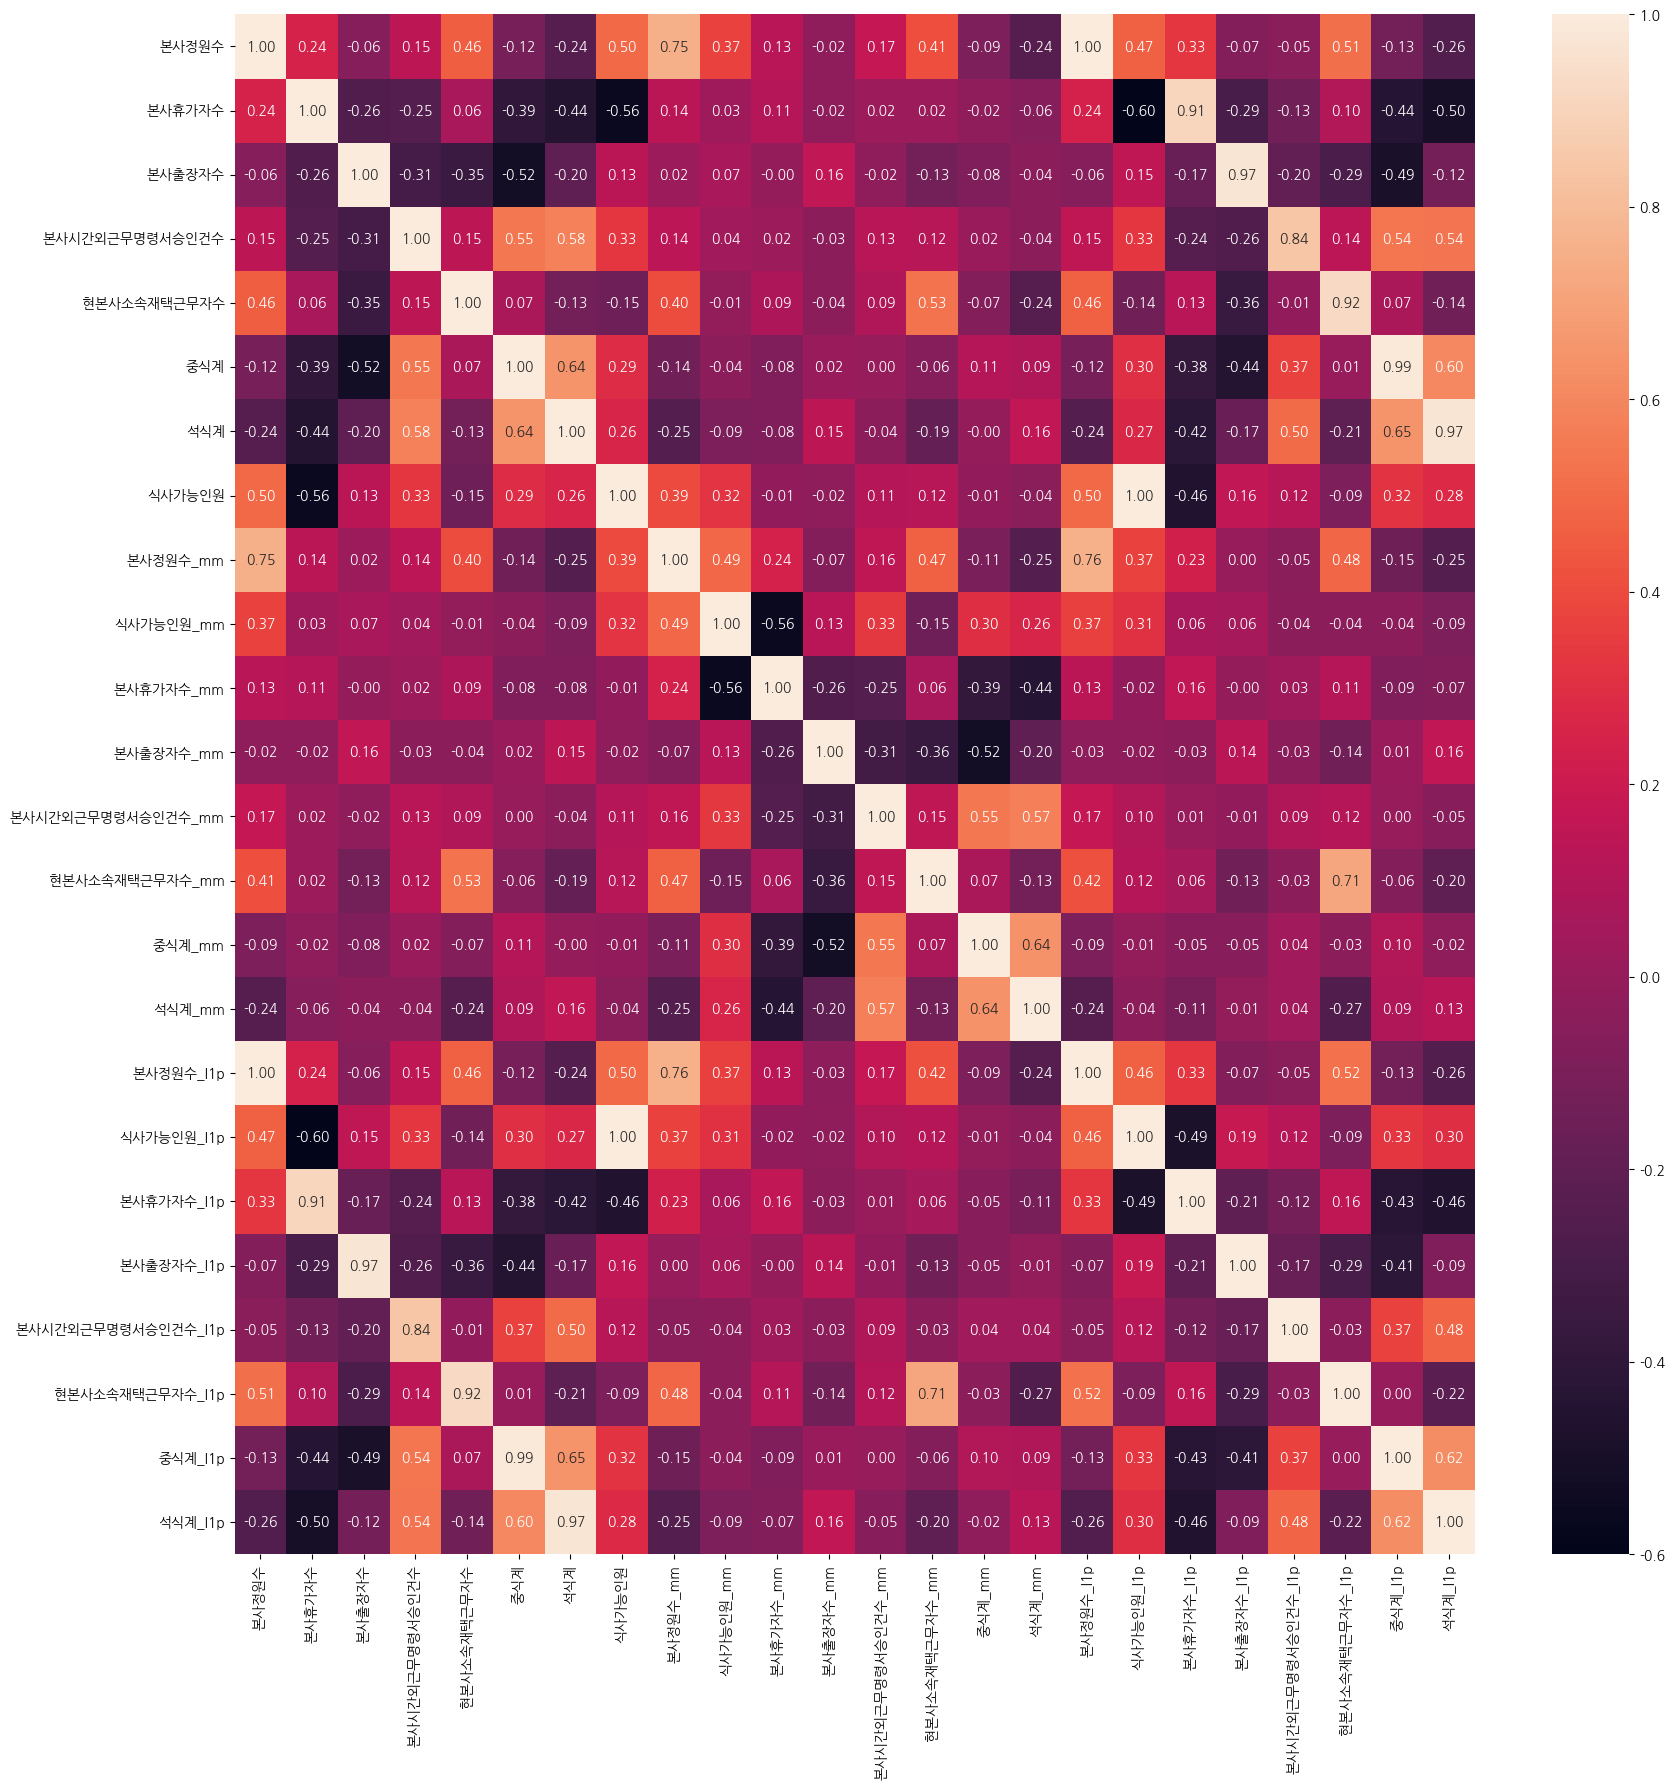

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt='.2f'
);

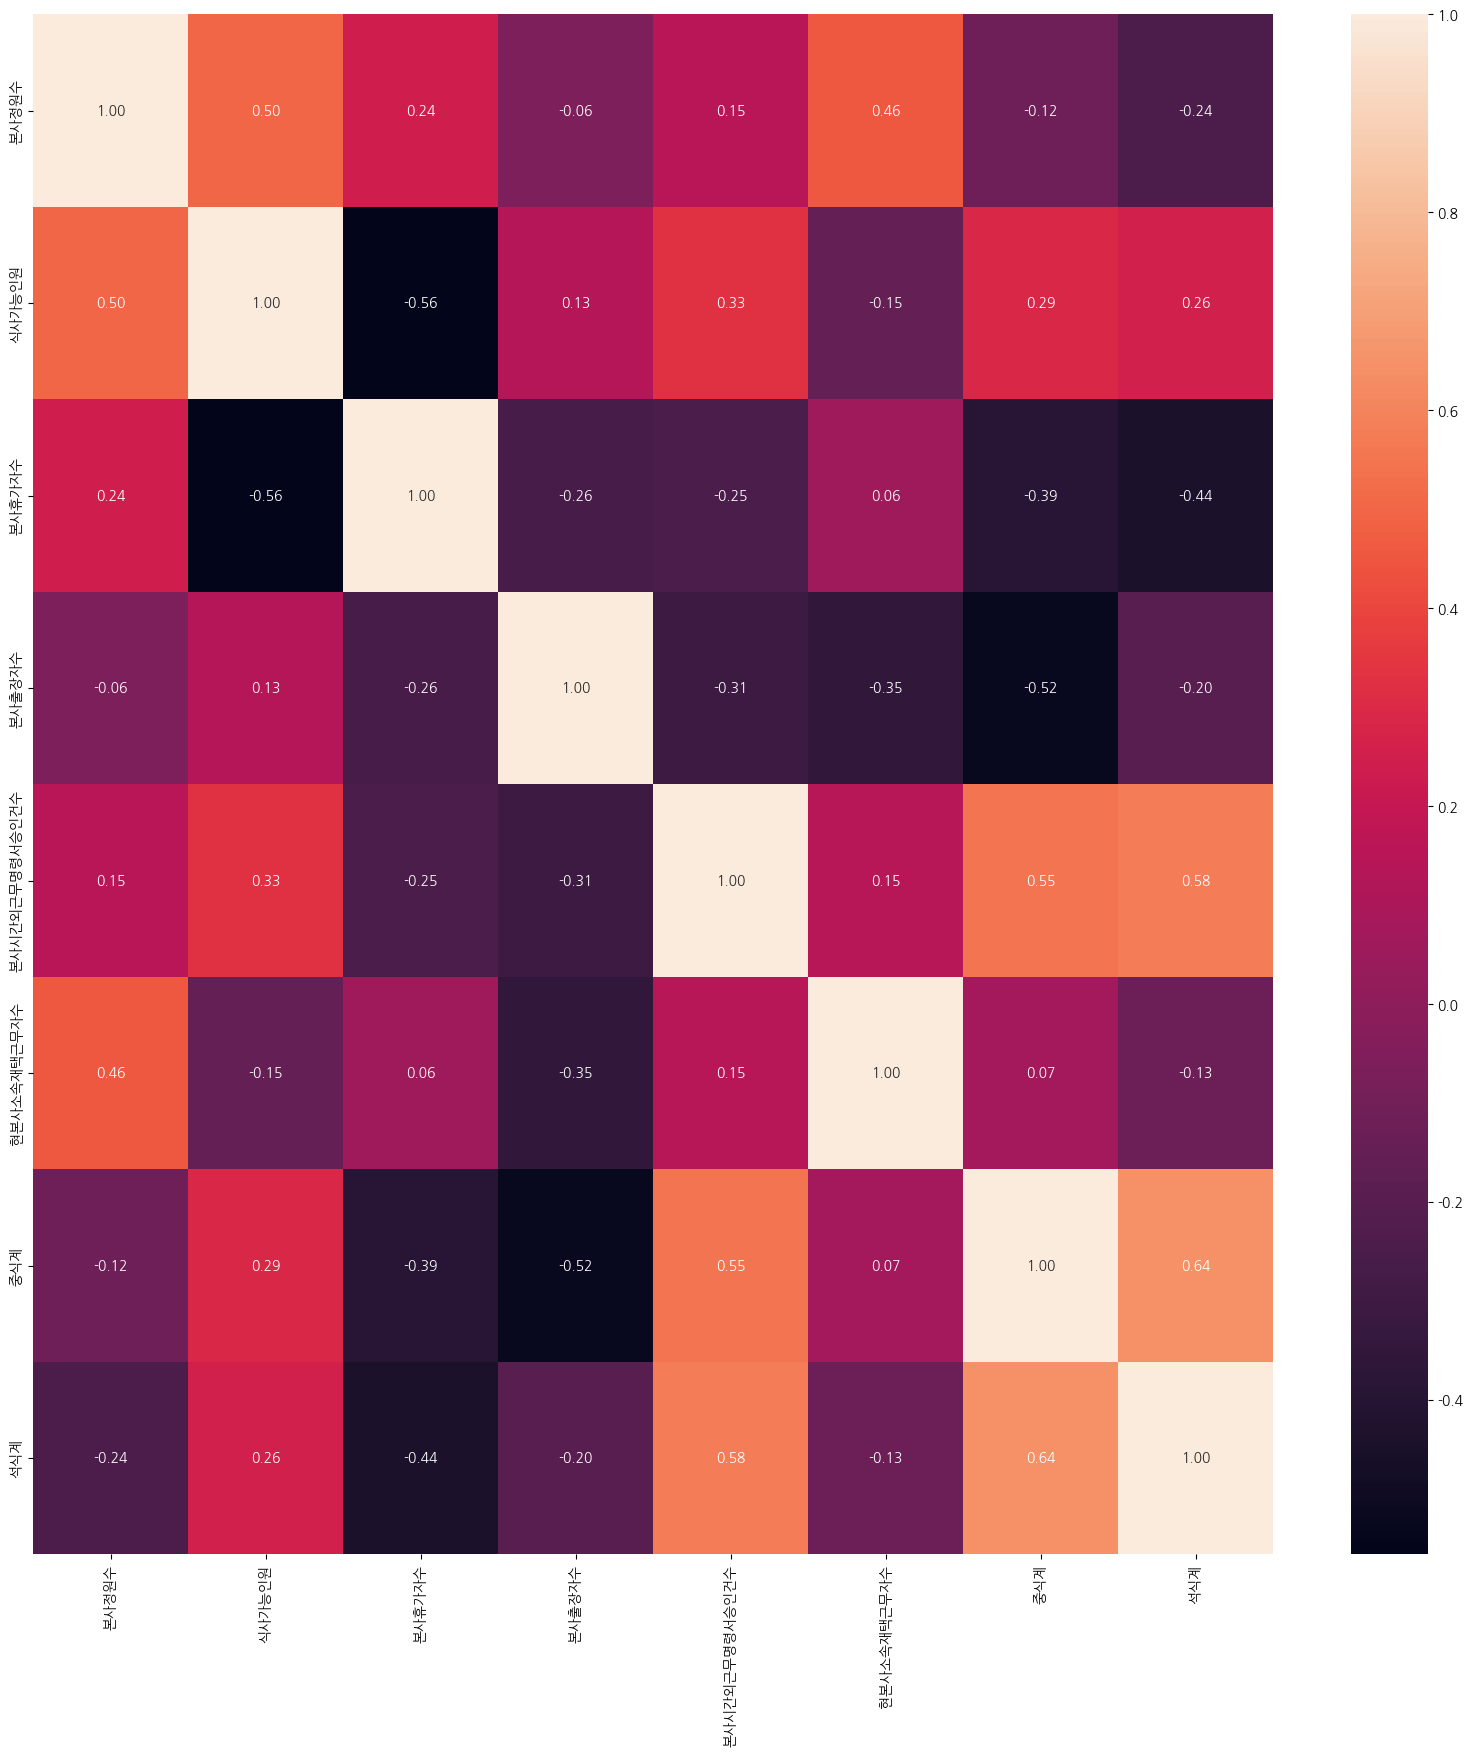

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df[scale_col].corr(),
    annot=True,
    fmt='.2f'
);

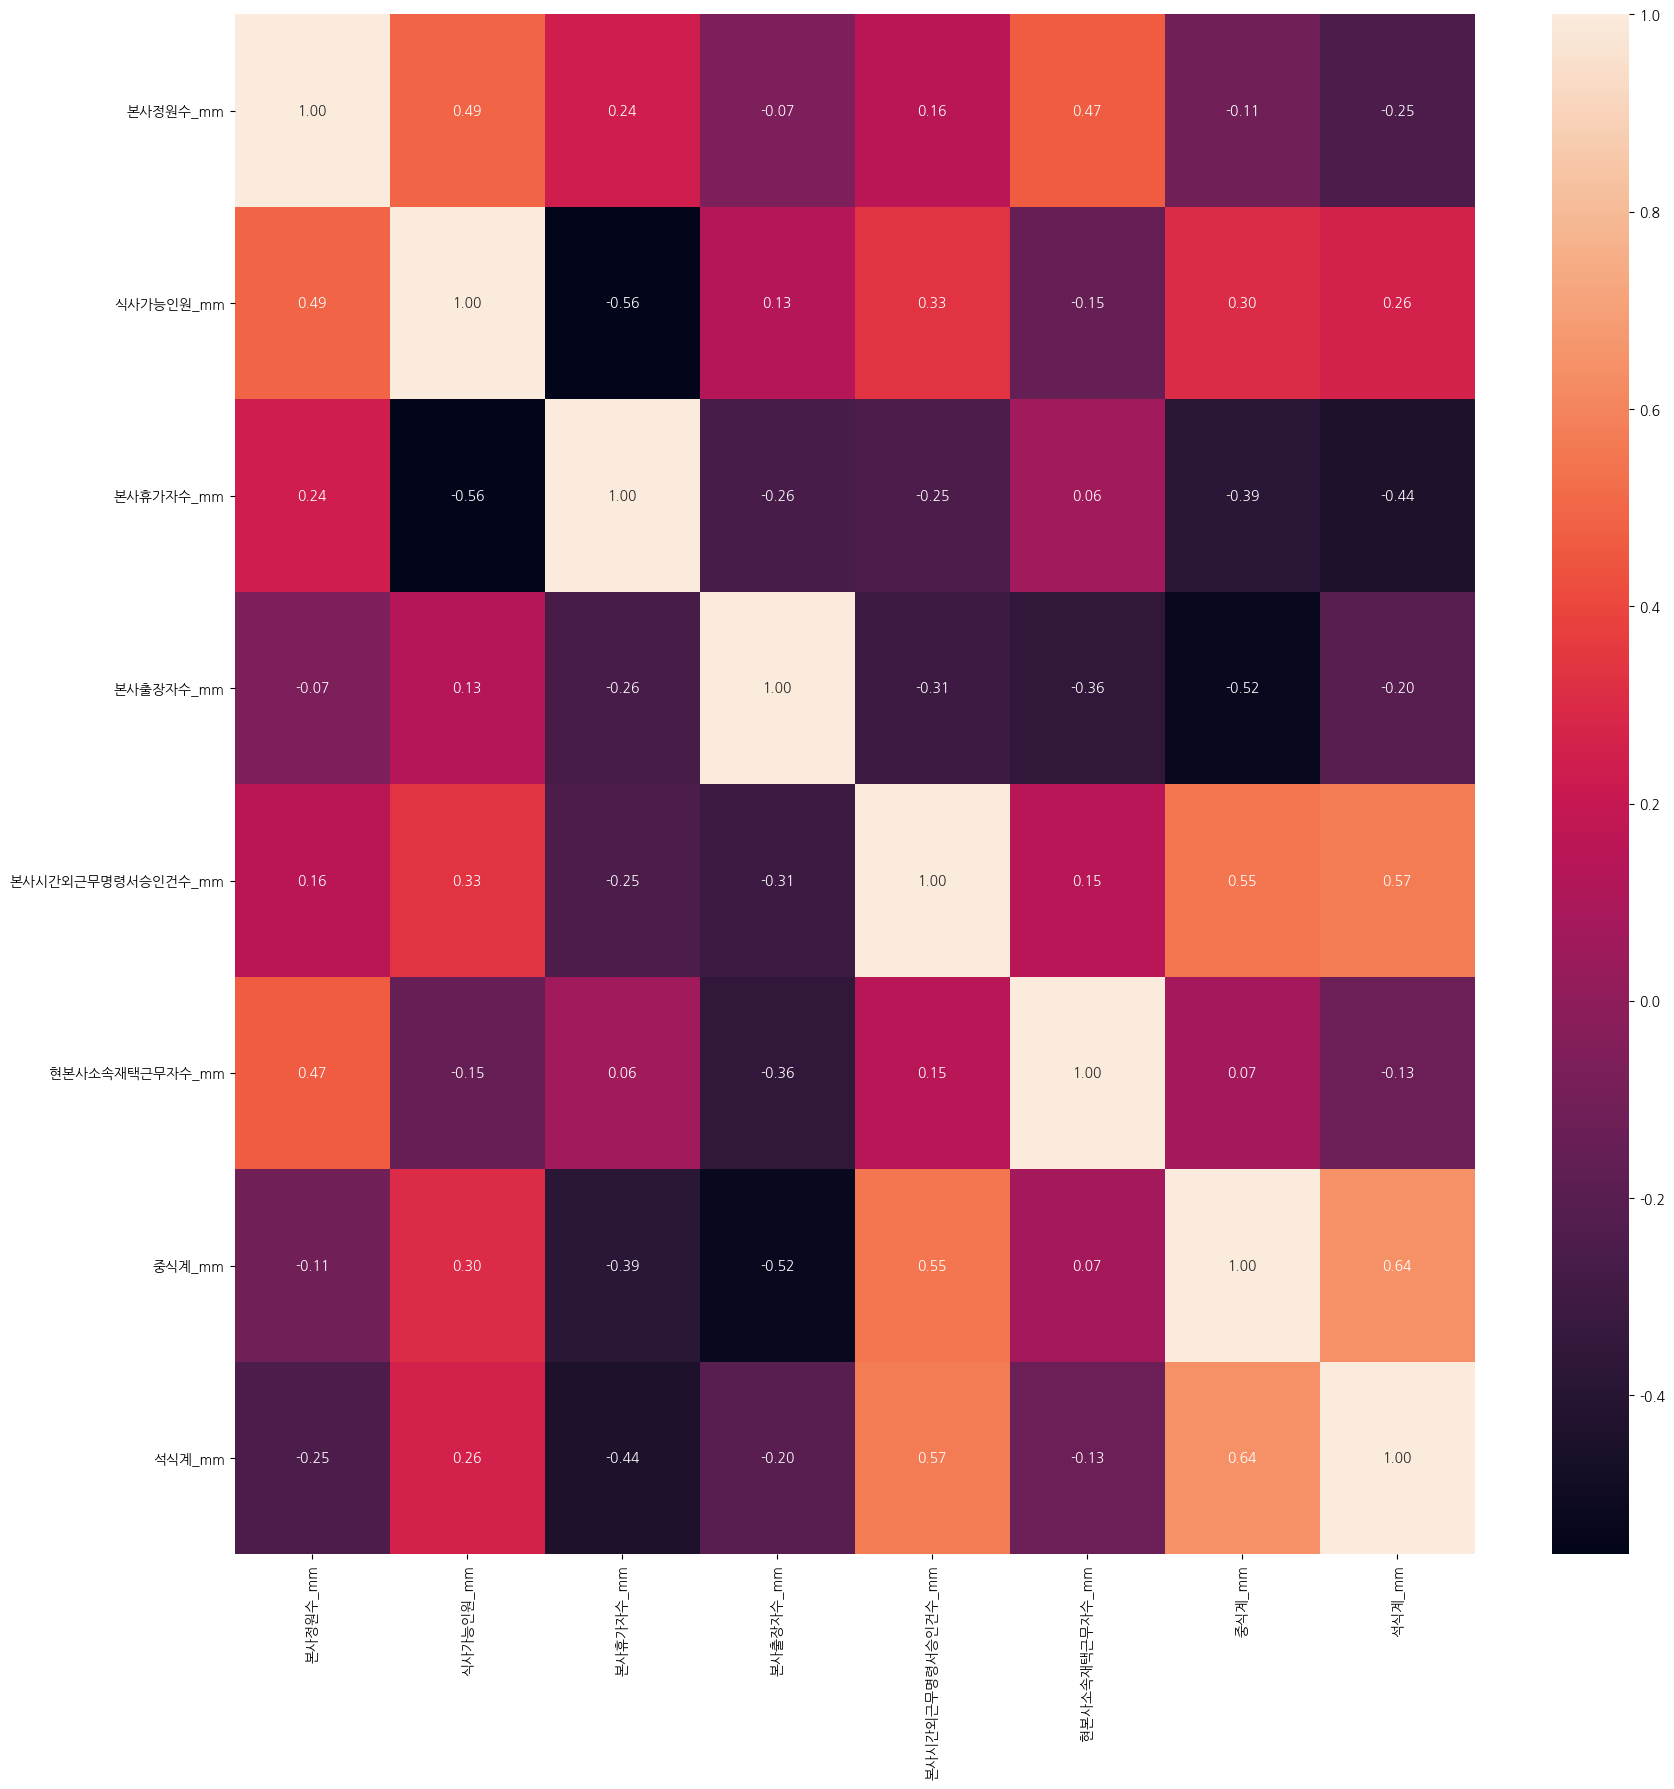

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df[list(mm_.columns)].corr(),
    annot=True,
    fmt='.2f'
);

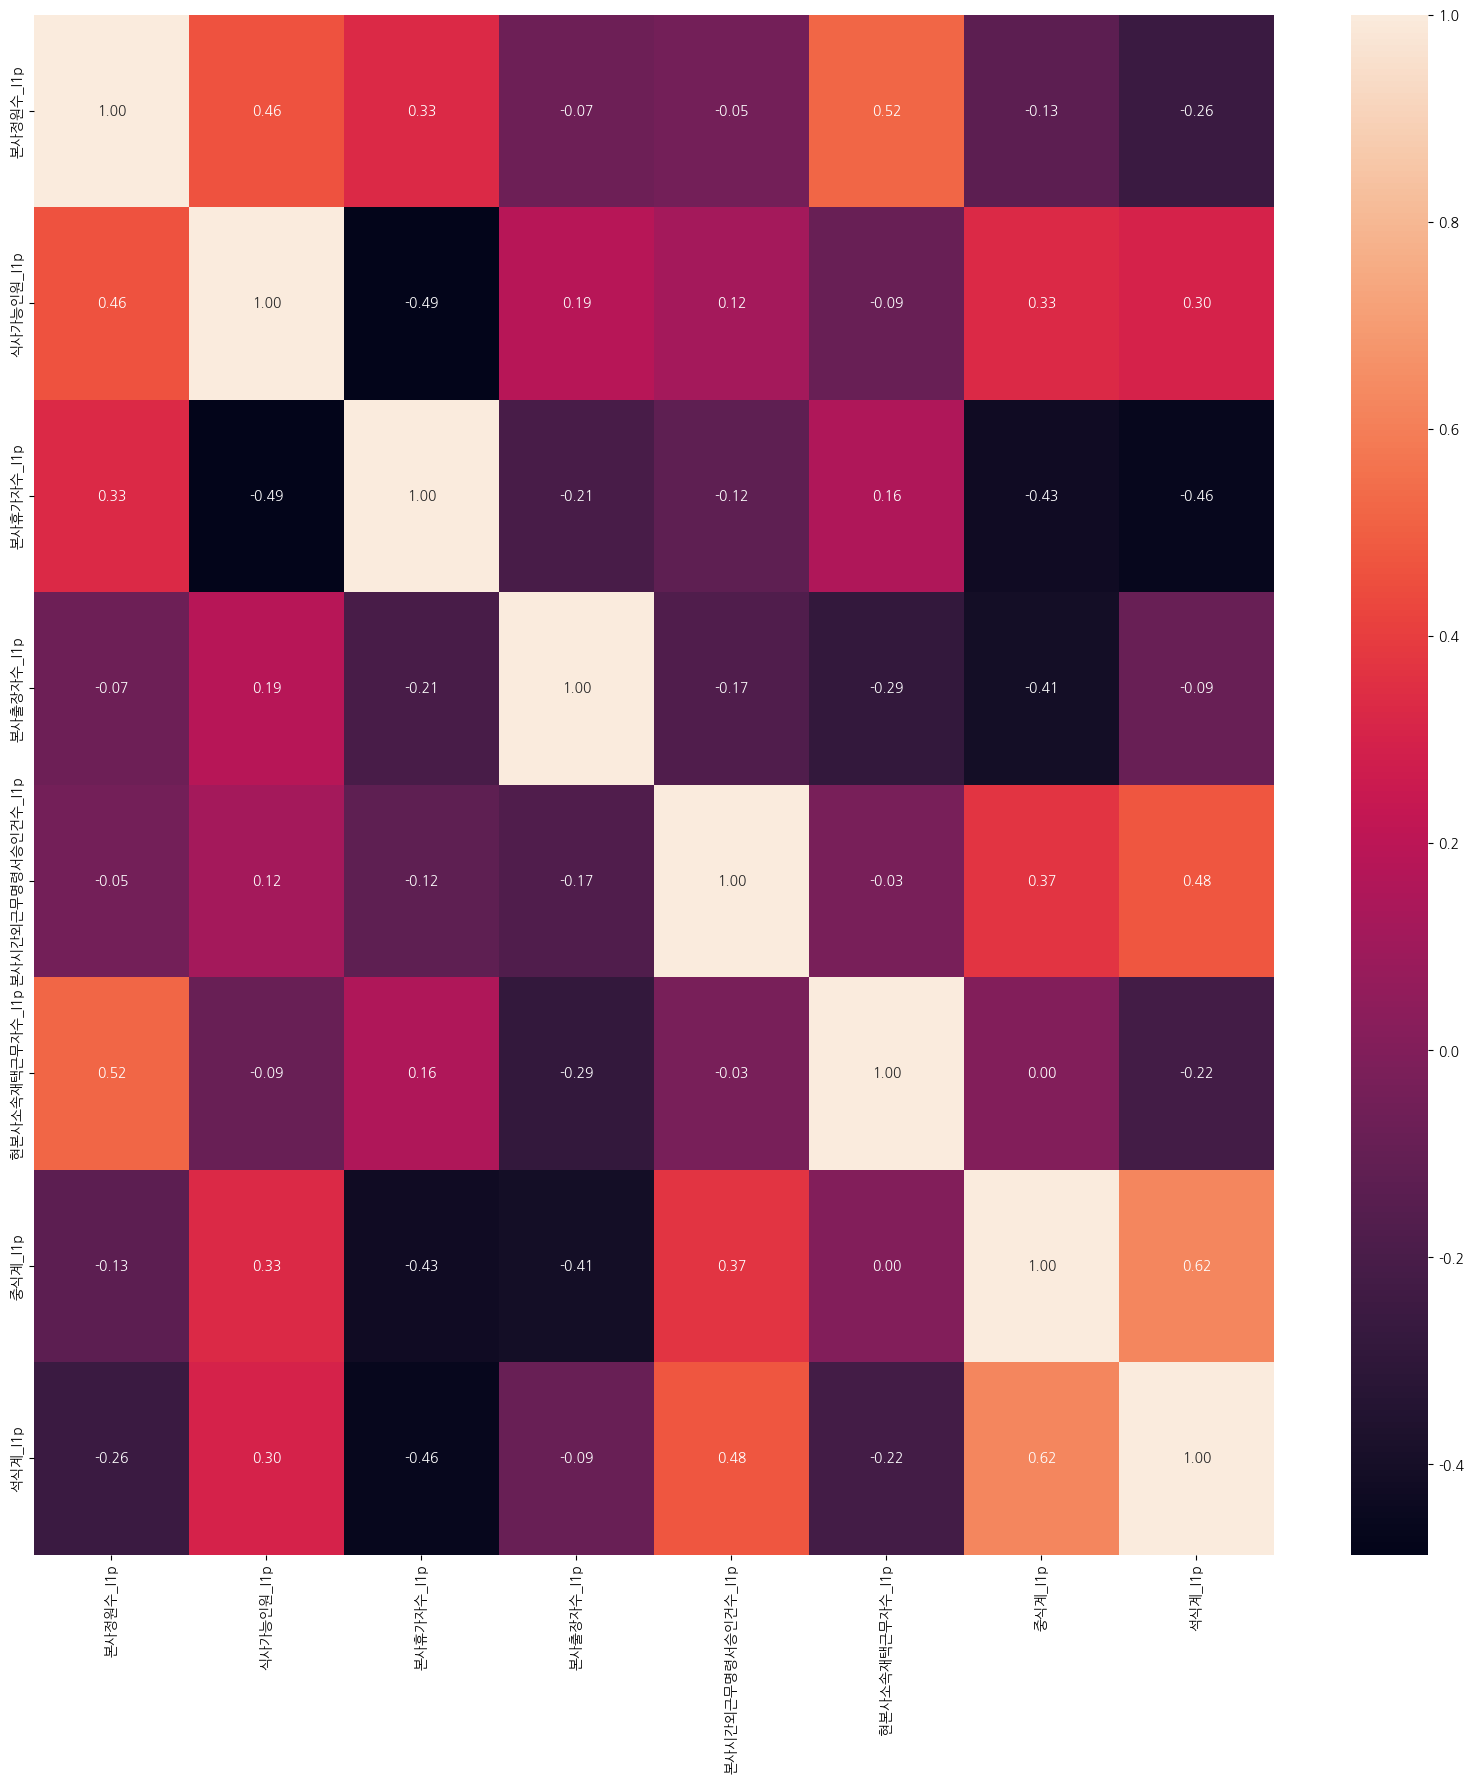

In [38]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df[list(l1p.columns)].corr(),
    annot=True,
    fmt='.2f'
);